<a href="https://colab.research.google.com/github/EmnaGaidi/Deep-Learning/blob/main/TP2_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Travail réalisé par :


*   OUESLATI Safa -groupe2-
*   GAIDI Emna -groupe1-
*   BEN AMMAR Hamza -groupe1-





In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import clone_model

# Classification Binaire



## 1.  Dataset


In [2]:
# Création du dataset
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# Affichage des dimensions du dataset
print("Dimensions de X :", X.shape)
print("Dimensions de y :", y.shape)


Dimensions de X : (1000, 2)
Dimensions de y : (1000,)


Question b. Les dimendions de l'entrée = 2 et de la sortie = 1

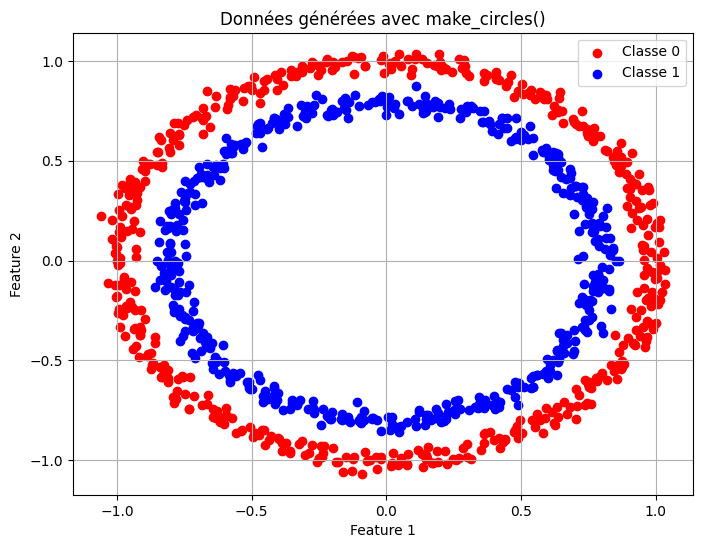

In [5]:
# Décomposition des caractéristiques X en deux colonnes pour le tracé
X1 = X[:, 0]
X2 = X[:, 1]
# Tracé des données en utilisant matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 0], X2[y == 0], color='red', label='Classe 0')
plt.scatter(X1[y == 1], X2[y == 1], color='blue', label='Classe 1')
plt.title("Données générées avec make_circles()")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Question d : Ce dataset nécessite une fonction non linéaire pour séparer ses classes. Car les données ne sont pas linéairement séparable c'est à dire on peut pas générer une droite qui sépare les deux classes.

In [6]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'apprentissage et de test
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (800, 2)
Dimensions de y_train : (800,)
Dimensions de X_test : (200, 2)
Dimensions de y_test : (200,)




## 2.   Définition du modèle



In [7]:
# Créer un modèle Sequential
model = Sequential()

# Ajouter une couche entièrement connectée avec 100 neurones cachés
model.add(Dense(100, input_shape=(2,), activation='relu'))  # input_shape=(2,) car nous avons 2 dimensions en entrée

# Ajouter une activation sigmoïde
model.add(Dense(1, activation='sigmoid'))

# Résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Compiler le modèle avec la fonction de perte et l'optimiseur spécifiés
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

In [11]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),verbose=0)
for i in range(0, 100, 10):
    print(f"Epoch {i+1}/{100} - Loss: {history.history['loss'][i]:.4f} - Accuracy: {history.history['accuracy'][i]:.4f} - Test Loss: {history.history['val_loss'][i]:.4f} - Test Accuracy: {history.history['val_accuracy'][i]:.4f}")


Epoch 1/100 - Loss: 0.4187 - Accuracy: 0.9975 - Test Loss: 0.4548 - Test Accuracy: 0.9900
Epoch 11/100 - Loss: 0.4101 - Accuracy: 0.9975 - Test Loss: 0.4469 - Test Accuracy: 0.9900
Epoch 21/100 - Loss: 0.4015 - Accuracy: 0.9975 - Test Loss: 0.4388 - Test Accuracy: 0.9900
Epoch 31/100 - Loss: 0.3926 - Accuracy: 0.9975 - Test Loss: 0.4307 - Test Accuracy: 0.9900
Epoch 41/100 - Loss: 0.3839 - Accuracy: 0.9975 - Test Loss: 0.4227 - Test Accuracy: 0.9900
Epoch 51/100 - Loss: 0.3753 - Accuracy: 0.9975 - Test Loss: 0.4147 - Test Accuracy: 0.9900
Epoch 61/100 - Loss: 0.3667 - Accuracy: 0.9975 - Test Loss: 0.4069 - Test Accuracy: 0.9950
Epoch 71/100 - Loss: 0.3583 - Accuracy: 0.9975 - Test Loss: 0.3988 - Test Accuracy: 0.9950
Epoch 81/100 - Loss: 0.3499 - Accuracy: 0.9987 - Test Loss: 0.3909 - Test Accuracy: 0.9950
Epoch 91/100 - Loss: 0.3415 - Accuracy: 0.9987 - Test Loss: 0.3832 - Test Accuracy: 0.9950


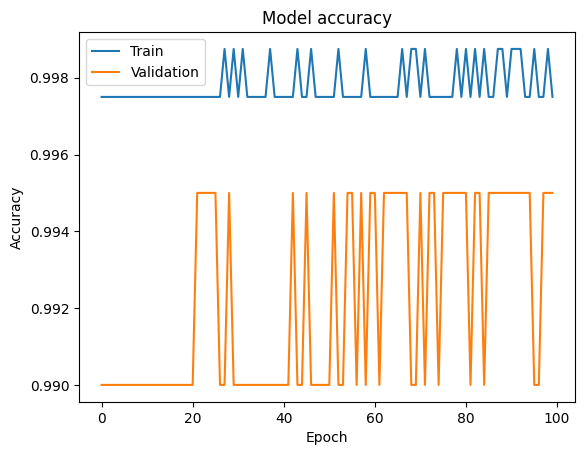

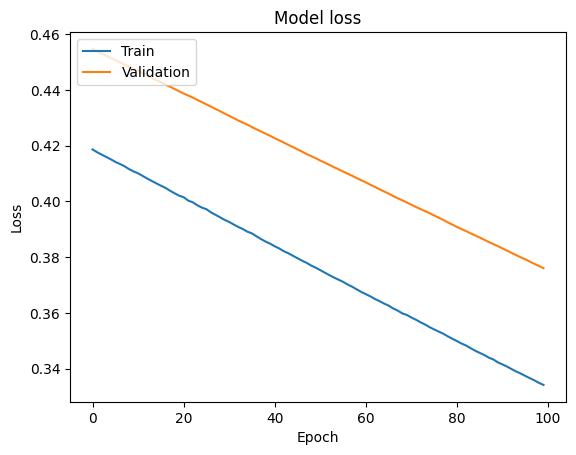

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1555/1555 [==============================] - 2s 1ms/step


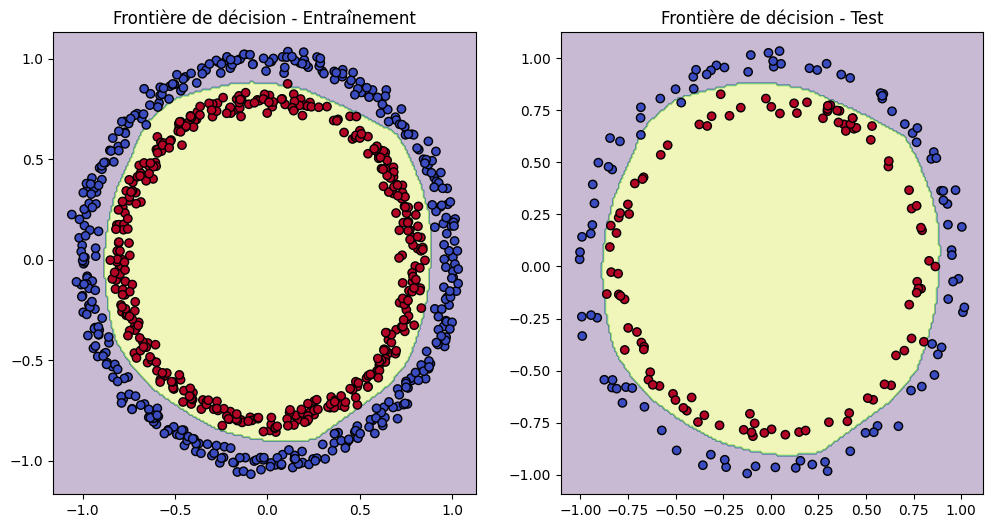

In [13]:
# Définition d'une fonction pour tracer les frontières de décision
def plot_decision_boundary(model, X, y):
    # Définition de la grille d'échantillons
    h = 0.01  # Pas de la grille
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Prédiction des étiquettes pour chaque point de la grille
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Tracé de la frontière de décision
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Tracé des points d'entraînement
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')

# Tracé des frontières de décision pour les ensembles d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Frontière de décision - Entraînement")
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Frontière de décision - Test")
plot_decision_boundary(model, X_test, y_test)

plt.show()


2. Le problème de ce modèle ce qu'on arrive pas à séparer parfaitement les deux classes.

3. Les amélioration qu'on va proposer sont :


*   La Régularisation
*   L'augmentation des données
*   L'augmentation du nombre des époques

Dans notre cas, on va augmenter le nombre des époques de 100 à 400

In [14]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test),verbose=0)
for i in range(0, 400, 10):
    print(f"Epoch {i+1}/{100} - Loss: {history.history['loss'][i]:.4f} - Accuracy: {history.history['accuracy'][i]:.4f} - Test Loss: {history.history['val_loss'][i]:.4f} - Test Accuracy: {history.history['val_accuracy'][i]:.4f}")

Epoch 1/100 - Loss: 0.3333 - Accuracy: 0.9987 - Test Loss: 0.3753 - Test Accuracy: 0.9950
Epoch 11/100 - Loss: 0.3251 - Accuracy: 0.9987 - Test Loss: 0.3676 - Test Accuracy: 0.9950
Epoch 21/100 - Loss: 0.3172 - Accuracy: 0.9987 - Test Loss: 0.3599 - Test Accuracy: 0.9950
Epoch 31/100 - Loss: 0.3093 - Accuracy: 0.9987 - Test Loss: 0.3524 - Test Accuracy: 0.9950
Epoch 41/100 - Loss: 0.3016 - Accuracy: 0.9987 - Test Loss: 0.3449 - Test Accuracy: 0.9950
Epoch 51/100 - Loss: 0.2942 - Accuracy: 0.9987 - Test Loss: 0.3377 - Test Accuracy: 0.9950
Epoch 61/100 - Loss: 0.2864 - Accuracy: 0.9987 - Test Loss: 0.3304 - Test Accuracy: 0.9950
Epoch 71/100 - Loss: 0.2792 - Accuracy: 0.9987 - Test Loss: 0.3232 - Test Accuracy: 0.9950
Epoch 81/100 - Loss: 0.2720 - Accuracy: 0.9987 - Test Loss: 0.3164 - Test Accuracy: 0.9950
Epoch 91/100 - Loss: 0.2651 - Accuracy: 0.9987 - Test Loss: 0.3095 - Test Accuracy: 0.9950
Epoch 101/100 - Loss: 0.2583 - Accuracy: 0.9987 - Test Loss: 0.3028 - Test Accuracy: 0.9950

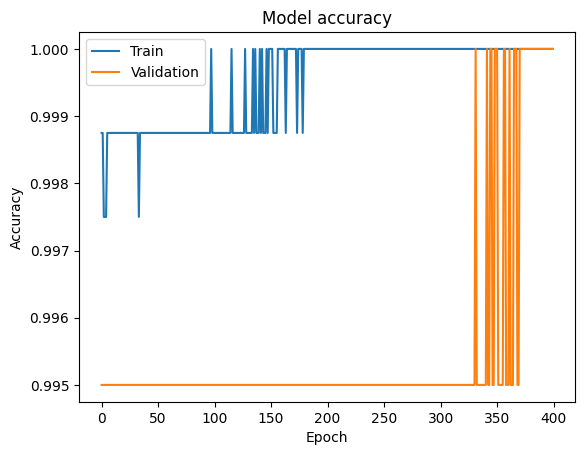

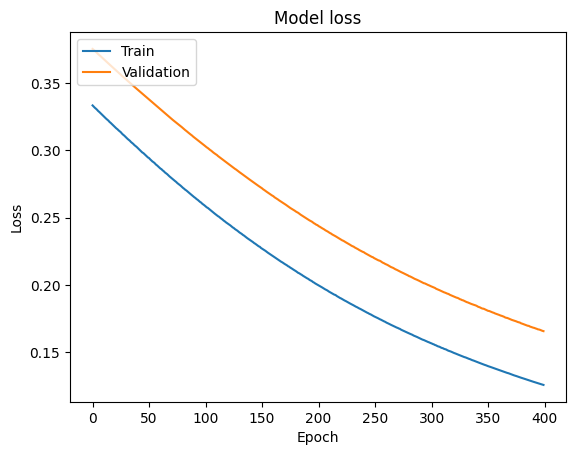

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1555/1555 [==============================] - 2s 1ms/step


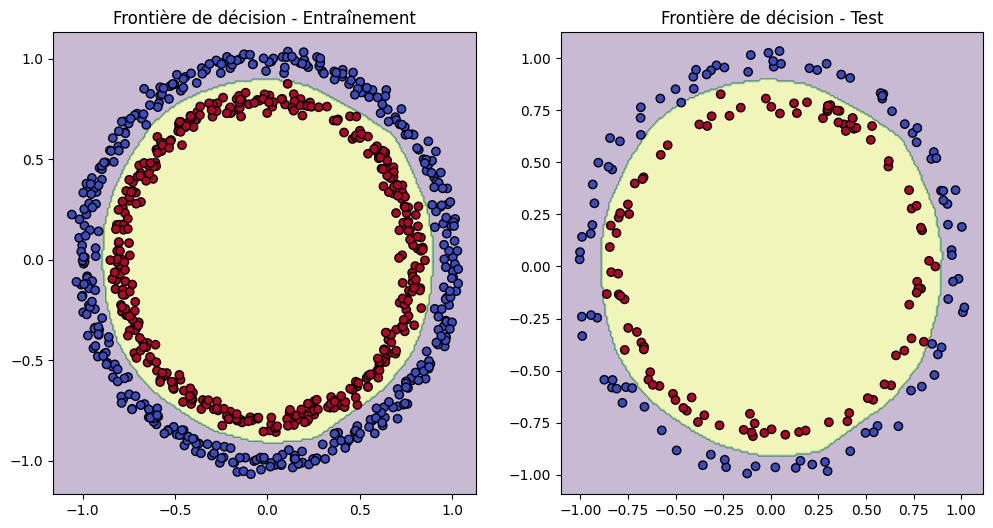

In [16]:
# Tracé des frontières de décision pour les ensembles d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Frontière de décision - Entraînement")
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Frontière de décision - Test")
plot_decision_boundary(model, X_test, y_test)

plt.show()

# La multi-Classification :

In [17]:
# Création des données multi-classes avec make_blobs()
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

# Affichage des dimensions du dataset
print("Dimensions de X :", X.shape)
print("Dimensions de y :", y.shape)

Dimensions de X : (1000, 2)
Dimensions de y : (1000,)


In [18]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'apprentissage et de test
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (800, 2)
Dimensions de y_train : (800,)
Dimensions de X_test : (200, 2)
Dimensions de y_test : (200,)


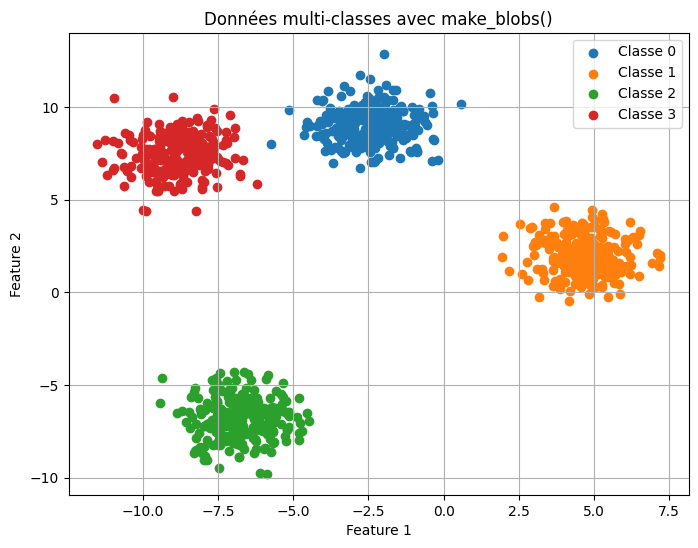

In [19]:
# Tracer les données
plt.figure(figsize=(8, 6))
for class_label in range(4):
    plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f'Classe {class_label}')
plt.title("Données multi-classes avec make_blobs()")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Créer le modèle
model = Sequential()

# Ajouter une couche d'entrée avec le bon nombre de neurones
model.add(Dense(64, input_dim=2, activation='relu')) # Par exemple, 64 neurones pour la première couche

# Ajouter des couches cachées
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Ajouter la couche de sortie avec la fonction d'activation softmax pour la classification multi-classe
model.add(Dense(4, activation='softmax'))

# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                192       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 6564 (25.64 KB)
Trainable params: 6564 (25.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compiler le modèle avec la fonction de perte et l'optimiseur spécifiés
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [22]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),verbose=0)
for i in range(0, 100, 10):
    print(f"Epoch {i+1}/{100} - Loss: {history.history['loss'][i]:.4f} - Accuracy: {history.history['accuracy'][i]:.4f} - Test Loss: {history.history['val_loss'][i]:.4f} - Test Accuracy: {history.history['val_accuracy'][i]:.4f}")


Epoch 1/100 - Loss: 0.6166 - Accuracy: 0.8375 - Test Loss: 0.1902 - Test Accuracy: 0.9950
Epoch 11/100 - Loss: 0.0035 - Accuracy: 0.9987 - Test Loss: 0.0026 - Test Accuracy: 1.0000
Epoch 21/100 - Loss: 0.0040 - Accuracy: 0.9987 - Test Loss: 0.0008 - Test Accuracy: 1.0000
Epoch 31/100 - Loss: 0.0034 - Accuracy: 0.9975 - Test Loss: 0.0005 - Test Accuracy: 1.0000
Epoch 41/100 - Loss: 0.0019 - Accuracy: 1.0000 - Test Loss: 0.0013 - Test Accuracy: 1.0000
Epoch 51/100 - Loss: 0.0018 - Accuracy: 0.9987 - Test Loss: 0.0003 - Test Accuracy: 1.0000
Epoch 61/100 - Loss: 0.0040 - Accuracy: 0.9975 - Test Loss: 0.0003 - Test Accuracy: 1.0000
Epoch 71/100 - Loss: 0.0020 - Accuracy: 0.9987 - Test Loss: 0.0009 - Test Accuracy: 1.0000
Epoch 81/100 - Loss: 0.0036 - Accuracy: 0.9987 - Test Loss: 0.0005 - Test Accuracy: 1.0000
Epoch 91/100 - Loss: 0.0026 - Accuracy: 0.9975 - Test Loss: 0.0002 - Test Accuracy: 1.0000


In [23]:
# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)

# Convertir les probabilités en classes (choisir l'indice de la classe avec la probabilité la plus élevée)
y_pred = np.argmax(y_pred, axis=1)
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print("Matrice de Confusion :")
print(conf_matrix)

# Afficher le rapport de classification (précision, rappel, score F1, support)
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 2ms/step
Matrice de Confusion :
[[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]

Rapport de Classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



39996/39996 [==============================] - 77s 2ms/step


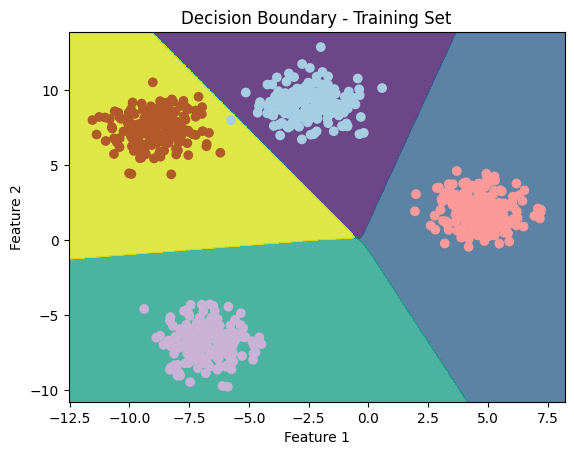

33521/33521 [==============================] - 60s 2ms/step


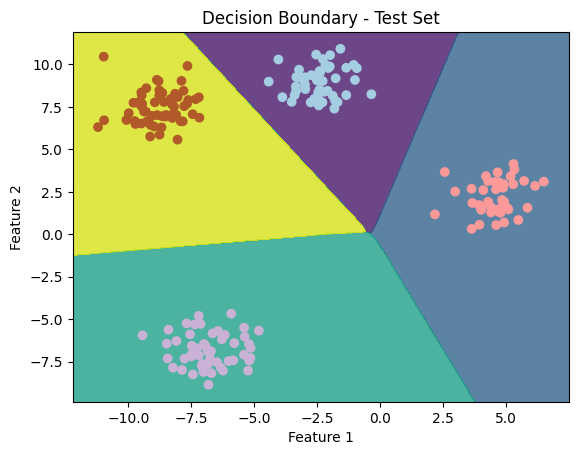

In [24]:
# 8. Tracer la (les) frontières(s) de décision pour les ensembles d’entraînement et de test
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Tracer la frontière de décision pour l'ensemble d'entraînement
plot_decision_boundary(X_train, y_train, model, title='Decision Boundary - Training Set')

# Tracer la frontière de décision pour l'ensemble de test
plot_decision_boundary(X_test, y_test, model, title='Decision Boundary - Test Set')

In [26]:
# Définir une fonction pour entraîner le modèle et renvoyer l'exactitude
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    return test_accuracy,test_loss

# Définir différentes tailles de dataset
sample_sizes = [500,1000,5000,10000,50000,100000,1000000]

# Entraîner le modèle pour différentes tailles de dataset et enregistrer les exactitudes
accuracies = []
for size in sample_sizes:
    print(f"for size: {size}")
    X, y = make_blobs(n_samples=size, n_features=2, centers=4, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accuracy,error = train_and_evaluate(X_train, y_train, X_test, y_test, model)
    accuracies.append(accuracy)

for size: 500
Epoch 1/100
13/13 [==============================] - 2s 51ms/step - loss: 5.3564e-05 - accuracy: 1.0000 - val_loss: 4.2537e-05 - val_accuracy: 1.0000
Epoch 2/100
13/13 [==============================] - 0s 36ms/step - loss: 5.2819e-05 - accuracy: 1.0000 - val_loss: 4.0954e-05 - val_accuracy: 1.0000
Epoch 3/100
13/13 [==============================] - 1s 43ms/step - loss: 5.1637e-05 - accuracy: 1.0000 - val_loss: 4.0062e-05 - val_accuracy: 1.0000
Epoch 4/100
13/13 [==============================] - 1s 51ms/step - loss: 5.0353e-05 - accuracy: 1.0000 - val_loss: 3.9310e-05 - val_accuracy: 1.0000
Epoch 5/100
13/13 [==============================] - 0s 33ms/step - loss: 4.9219e-05 - accuracy: 1.0000 - val_loss: 3.8615e-05 - val_accuracy: 1.0000
Epoch 6/100
13/13 [==============================] - 0s 24ms/step - loss: 4.7963e-05 - accuracy: 1.0000 - val_loss: 3.7961e-05 - val_accuracy: 1.0000
Epoch 7/100
13/13 [==============================] - 0s 38ms/step - loss: 4.6983e-05 -

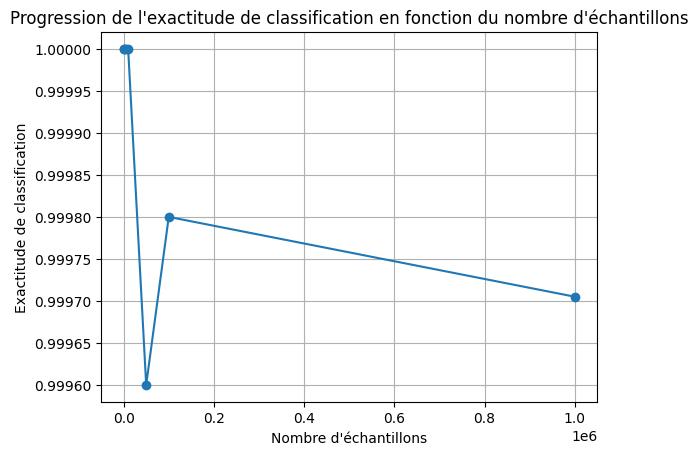

In [27]:
# Afficher la courbe de progression de l'exactitude de classification en fonction du nombre d'échantillons dans le dataset
plt.plot(sample_sizes, accuracies, marker='o')
plt.title('Progression de l\'exactitude de classification en fonction du nombre d\'échantillons')
plt.xlabel('Nombre d\'échantillons')
plt.ylabel('Exactitude de classification')
plt.grid(True)
plt.show()